In [2]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm


%load_ext autoreload
%autoreload 2

# TO CHANGE
# absolute path to ACCAL/ACCAL folder
appPath = Path(r"D:\Stage\ACCAL\ACCAL")
sys.path.append(str(appPath))

#Kernel module
import numpy as np
import modules.features.kernel
import modules.features.selection
import scipy.sparse


# Path to data 
dataFolderPath = Path(r"D:\Stage\ACCAL\data\dataTest1","temp","processedImages")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
K = modules.features.kernel.getK(l=4.0,absAppPath=appPath ,pixelSide=360)

In [26]:
pathList = sorted(list(dataFolderPath.glob("*.npy")))

In [30]:
featuresList = modules.features.selection.getFeatures(250,K,pathList[0])

In [31]:
featuresList

array([  8408,  14593,  80879,  34756,  39792,  36612,  45624,   9678,
        75480,   4805,  16908,  25003,  78589,  21234, 106376, 124530,
        45757,  10931,  45167,  35704,   2812,  12220,  21061,   3453,
       112121, 105334, 121300,   7148,  38001,  13441,  25644, 128117,
        94839,  35242, 117709, 116504,  10051, 128003,  83688,  95642,
        45734,  32223,  27425,  17008, 110018,  62318,  73096, 115803,
       101360,  90517,  54519,  10276,  42514, 109400, 117162,  62803,
        22851,   4980,  87359,  87948,   8755, 122603, 104200,  17466,
        55263,  40498,  73834,  33374, 127295, 101730, 118903, 108796,
         5981, 108161,  37681,  94154, 114475,  91681,  57407,  50199,
       120050, 125833,  25048,   6987,  49827,  67921,  72594,  51724,
        43246,  99241,  98621,  38217,  22033,  52789,  13865,  60273,
       113260,  15359, 123293,  41044,  31170,   6672,  29347,  60510,
        16329,  61652,  58456,  40885,  56050,  98439,  30552,  13386,
      

In [42]:
coord = np.array([[i%360,i//360] for i in featuresList])

In [43]:
img = np.load(pathList[0])

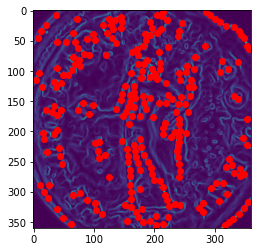

In [45]:
plt.imshow(img)
plt.scatter(coord[:,0],coord[:,1],color='r')

In [48]:
from multiprocessing import Pool
import time

In [ ]:
t1 = time.perf_counter()

#Pool of 4 workers (4 cores)
pool = Pool(4)
processes = [pool.apply_async(modules.features.selection.getFeatures, args=(250,K,path)) for path in pathList]
result = [p.get() for p in processes]

tf = time.perf_counter()
dt = tf-t1

In [ ]:
print(dt)